In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium

In [17]:
path = "../wa_collisions/data/Collisions_test.csv"
collisions=pd.read_csv(path)

In [18]:
collisions.head()

,X,Y,objectid,inckey,coldetkey,addrtype,collisiontype,exceptrsncode,exceptrsndesc,fatalities,...,speeding,st_colcode,st_coldesc,status,underinfl,vehcount,weather,seglanekey,crosswalkkey,hitparkedcar
0,NaN,NaN,162244240,233078,233478,NaN,Rear Ended,NEI,"Not Enough Information, or Insufficient Locati...",0,...,Y,13,From Same Direction - Both Going Straight - Bo...,Matched,N,2,Raining,0,0,N
1,-122.379491,47.690601,162244422,240398,240838,Block,Parked Car,,NaN,0,...,NaN,32,One Parked - One Moving,Matched,Y,3,Raining,0,0,Y
2,-122.378889,47.665053,162244373,240454,240894,Intersection,Other,,NaN,0,...,NaN,50,Struck Fixed Object,Matched,N,1,Overcast,0,0,N
3,-122.376803,47.689665,162244142,232984,233384,Block,Parked Car,,NaN,0,...,NaN,32,One Parked - One Moving,Matched,Y,2,Raining,0,0,Y
4,-122.372173,47.667888,162244238,232990,233390,Block,Parked Car,NEI,"Not Enough Information, or Insufficient Locati...",0,...,NaN,32,One Parked - One Moving,Matched,N,2,Raining,0,0,N


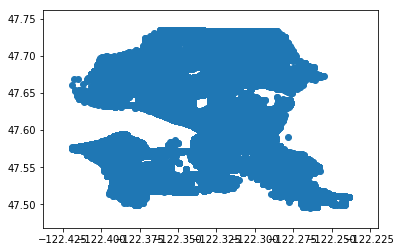

In [5]:
%matplotlib inline
plt.scatter(collisions.X,collisions.Y)

We can verify that our data looks roughly like Seattle.

In [6]:
m = folium.Map(location=[47.706850, -122.333961])

In [7]:
m

There a few different types of maps we could

In [8]:
folium.Map(
    location=[47.706850, -122.333961],
    tiles='OpenStreetMap',
    zoom_start=13
)

In [9]:
m = folium.Map(
    location=[47.6, -122.333961],
    tiles='Stamen Toner',
    zoom_start=13
)

m

Let's add some markers for all sideswipe collisions

In [10]:
df_ss = collisions[(~collisions['X'].isna()) & (~collisions['Y'].isna()) & (collisions['collisiontype']=='Sideswipe')].head(1000)
print('Lenght of df_ss: ',len(df_ss))
df_ss.head()

Lenght of df_ss:  1000


,X,Y,objectid,inckey,coldetkey,addrtype,collisiontype,exceptrsncode,exceptrsndesc,fatalities,...,speeding,st_colcode,st_coldesc,status,underinfl,vehcount,weather,seglanekey,crosswalkkey,hitparkedcar
55,-122.292625,47.611042,162244273,233099,233499,Block,Sideswipe,,NaN,0,...,Y,71,Same Direction - Both Turning Right - Both Mov...,Matched,N,4,Clear or Partly Cloudy,0,0,N
56,-122.334192,47.597382,162244274,233021,233421,Block,Sideswipe,,NaN,0,...,NaN,12,From Same Direction -Both Going Straight-One S...,Matched,Y,2,Clear or Partly Cloudy,0,0,N
79,-122.334832,47.522784,162244297,233052,233452,Block,Sideswipe,,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,N,2,Clear or Partly Cloudy,0,0,N
84,-122.334191,47.543655,162244302,233069,233469,Block,Sideswipe,,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,N,2,Clear or Partly Cloudy,0,0,N
102,-122.276741,47.547433,162244320,240446,240886,Block,Sideswipe,,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,N,2,Overcast,0,0,N


In [13]:
m = folium.Map(
    location=[47.6, -122.333961],
    tiles='Stamen Toner',
    zoom_start=11
)

for i in range(0,len(df_ss)):
    folium.Marker(
        location=[df_ss.iloc[i]['Y'],df_ss.iloc[i]['X']],
        popup=df_ss.iloc[i]['incdttm']
    ).add_to(m)

In [14]:
m

This looks busy. Fortunately, there are plugins to help us cluster markers.

In [16]:
from folium import plugins

m = folium.Map(
    location=[47.6, -122.333961],
    tiles='Stamen Toner',
    zoom_start=11
)

df_ss['Range']=range(0,1000)
data = df_ss[['Y','X','Range']].as_matrix()


plugins.MarkerCluster(data).add_to(m)

m

That's cool!